In [2]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

In [6]:
# Display all columns when using df.head()
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

# Now df.head() shows all columns
df.head()

,fips,population,dep_prevalence,Households Total,Households Mean income (dollars),Households Median income (dollars),Premature Death Deaths,Premature Death Years of Potential Life Lost Rate,Poor Physical Health Days Average Number of Physically Unhealthy Days,Low Birth Weight % Low Birth Weight,Poor Mental Health Days Average Number of Mentally Unhealthy Days,Poor or Fair Health % Fair or Poor Health,Flu Vaccinations % Vaccinated,Access to Exercise Opportunities % With Access to Exercise Opportunities,Food Environment Index Food Environment Index,Primary Care Physicians # Primary Care Physicians,Primary Care Physicians Primary Care Physicians Rate,Primary Care Physicians Primary Care Physicians Ratio,Mental Health Providers # Mental Health Providers,Mental Health Providers Mental Health Provider Rate,Mental Health Providers Mental Health Provider Ratio,Dentists # Dentists,Dentists Dentist Rate,Dentists Dentist Ratio,Preventable Hospital Stays Preventable Hospitalization Rate,Mammography Screening % with Annual Mammogram,Uninsured # Uninsured,Uninsured % Uninsured,Severe Housing Problems % Severe Housing Problems,Severe Housing Problems Severe Housing Cost Burden,Severe Housing Problems Overcrowding,Severe Housing Problems Inadequate Facilities,Driving Alone to Work % Drive Alone to Work,Long Commute - Driving Alone # Workers who Drive Alone,Long Commute - Driving Alone % Long Commute - Drives Alone,Air Pollution: Particulate Matter Average Daily PM2.5,Drinking Water Violations Presence of Water Violation,Broadband Access % Households with Broadband Access,Broadband Access # Households with Broadband Access,Library Access Visits per service area population,Some College # Some College,Some College Population,Some College % Some College,High School Completion # Completed High School,High School Completion Population,High School Completion % Completed High School,Unemployment # Unemployed,Unemployment Labor Force,Unemployment % Unemployed,Income Inequality 80th Percentile Income,Income Inequality 20th Percentile Income,Income Inequality Income Ratio,Children in Poverty % Children in Poverty,Injury Deaths # Injury Deaths,Injury Deaths Injury Death Rate,Social Associations # Associations,Social Associations Social Association Rate,Child Care Cost Burden % Household Income Required for Child Care Expenses
0,1001,60436,18,NaN,NaN,NaN,1008.0,9938.263382,4.300364,9.995826,5.832901,17.7,36.0,54.491965,6.8,26.0,43.99695,2273:1,22.0,36.45885,2743:1,18.0,30.12099,3320:1,4365.0,46.0,4053.0,8.190361,13.520933,11.749710,1.459620,1.029513,84.916222,26976.0,42.1,9.3,No,90.880433,20469.0,1.124569,9518.0,15507.0,61.378732,36804.0,40767.0,90.278902,591.0,27000.0,2.188889,132562.0,31018.0,4.273712,17.0,189.0,65.975725,67.0,11.211700,21.835108
1,1003,254107,18,105698.0,98279.0,72915.0,3944.0,8957.112686,3.876436,8.133286,6.020778,17.0,44.0,61.624390,7.4,150.0,62.68440,1595:1,306.0,120.70673,828:1,116.0,47.07124,2124:1,2888.0,45.0,19478.0,10.212342,11.968116,10.149443,1.462324,0.705356,80.296745,108241.0,38.1,7.8,No,89.750851,84942.0,3.862097,36106.0,55678.0,64.847875,157767.0,171988.0,91.731400,2380.0,104409.0,2.279497,141920.0,32554.0,4.359526,14.1,953.0,82.420053,239.0,9.698298,19.354057
2,1005,24644,19,NaN,NaN,NaN,587.0,12738.656137,5.431030,12.454212,6.339986,28.4,39.0,54.858661,6.2,10.0,40.05768,2496:1,7.0,28.47265,3512:1,8.0,32.38080,3088:1,3560.0,47.0,2025.0,12.117042,13.806381,9.512335,4.345435,0.605061,82.408501,8470.0,37.5,8.8,No,72.301762,6565.0,0.693579,2869.0,6509.0,44.077431,13717.0,17628.0,77.813705,352.0,7944.0,4.431017,99138.0,17658.0,5.614339,34.8,106.0,85.603993,22.0,8.904720,28.579628
3,1007,21890,24,NaN,NaN,NaN,509.0,11708.948038,5.055619,10.017472,6.565945,25.1,31.0,43.390302,7.3,15.0,66.73488,1498:1,8.0,36.58314,2734:1,5.0,22.72211,4401:1,5029.0,36.0,1758.0,10.835799,11.926606,9.051054,0.917431,1.976006,87.893346,8326.0,53.5,8.6,Yes,81.151763,6144.0,1.005724,2686.0,6170.0,43.533225,12799.0,15931.0,80.340217,216.0,8772.0,2.46238

<Figure size 1000x600 with 0 Axes>

(array([ 10.,   0.,   1.,   1.,   0.,   7.,  16.,  30.,  34.,  67., 108.,
        122., 398., 272., 363., 358., 369., 342., 414., 129.,  94.,  45.,
         19.,  27.,   9.,   2.,   2.,   1.,   0.,   1.]),
 array([ 0.        ,  1.16666667,  2.33333333,  3.5       ,  4.66666667,
         5.83333333,  7.        ,  8.16666667,  9.33333333, 10.5       ,
        11.66666667, 12.83333333, 14.        , 15.16666667, 16.33333333,
        17.5       , 18.66666667, 19.83333333, 21.        , 22.16666667,
        23.33333333, 24.5       , 25.66666667, 26.83333333, 28.        ,
        29.16666667, 30.33333333, 31.5       , 32.66666667, 33.83333333,
        35.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Distribution of Depression Prevalence')

Text(0.5, 0, 'Depression Prevalence')

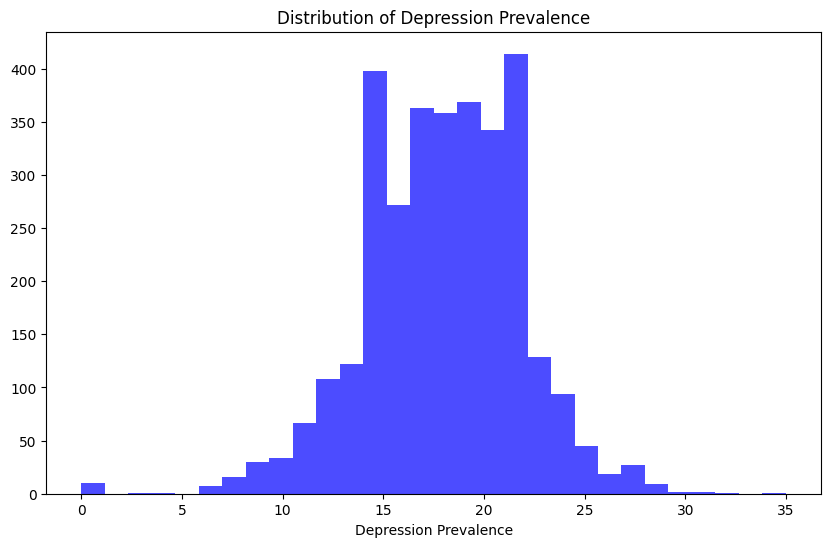

In [7]:
# Univariate Plot of depression prevalence
plt.figure(figsize=(10, 6))
plt.hist(df['dep_prevalence'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Depression Prevalence')
plt.xlabel('Depression Prevalence')

In [8]:
# Display basic info
print(df.info())  # Check dtypes, missing values
print(df.shape)   # Rows × columns

# Summary statistics for numerical columns
print(df.describe(include='all').T)  # Include categorical if any

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 58 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   fips                                                                        3241 non-null   int64  
 1   population                                                                  3241 non-null   int64  
 2   dep_prevalence                                                              3241 non-null   int64  
 3   Households Total                                                            845 non-null    float64
 4   Households Mean income (dollars)                                            845 non-null    float64
 5   Households Median income (dollars)                                          845 non-null    float64
 6   Premature Death Deaths                          

In [9]:
# Check missing values per column
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])

# Options:
# 1. Drop columns with high missingness (if irrelevant)
#    df.drop(columns=['Households Total'], inplace=True)
# 2. Impute (e.g., median for income columns)
#    df['Households Median income (dollars)'].fillna(df['Households Median income (dollars)'].median(), inplace=True)

Households Mean income (dollars)                                              2396
Households Total                                                              2396
Households Median income (dollars)                                            2396
Premature Death Deaths                                                         341
Premature Death Years of Potential Life Lost Rate                              341
Mental Health Providers Mental Health Provider Rate                            292
Mental Health Providers Mental Health Provider Ratio                           292
Mental Health Providers # Mental Health Providers                              292
Primary Care Physicians Primary Care Physicians Rate                           268
Primary Care Physicians # Primary Care Physicians                              268
Primary Care Physicians Primary Care Physicians Ratio                          268
Library Access Visits per service area population                              247
Inju

array([[<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'dep_prevalence'}>]], dtype=object)

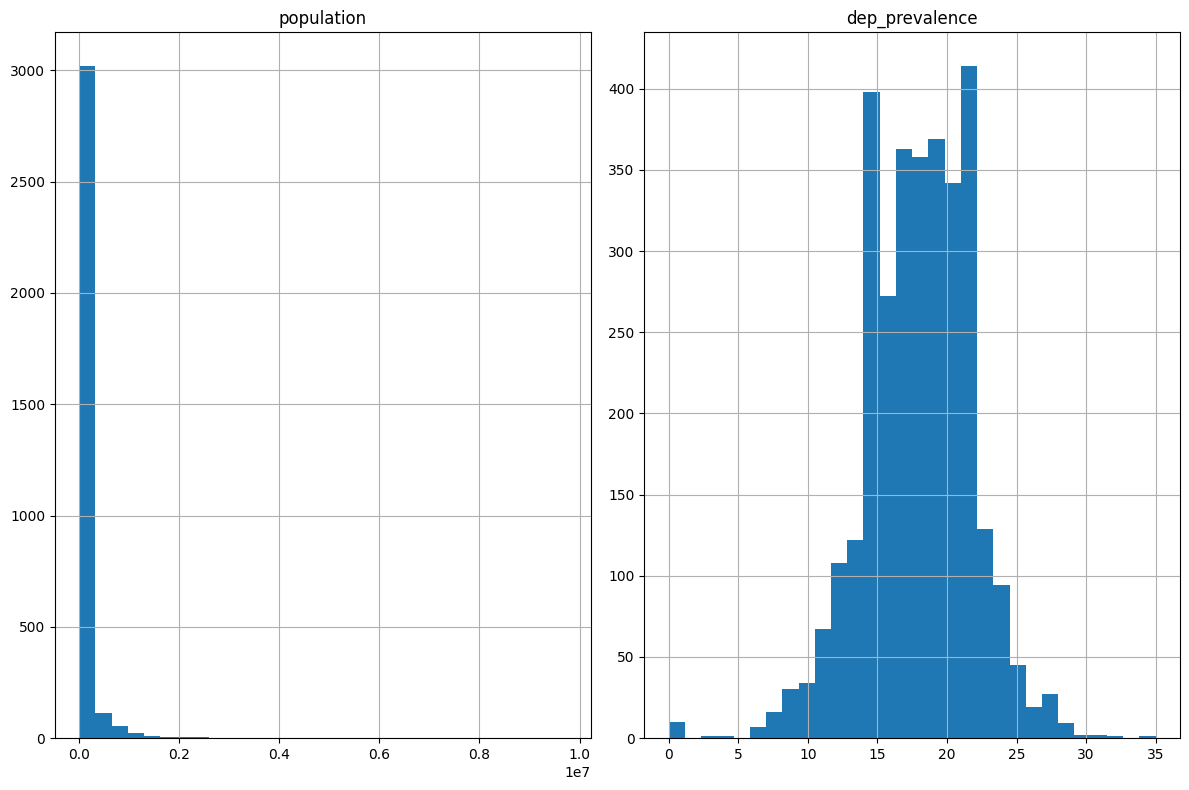

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for key columns
num_cols = ['population', 'dep_prevalence']
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

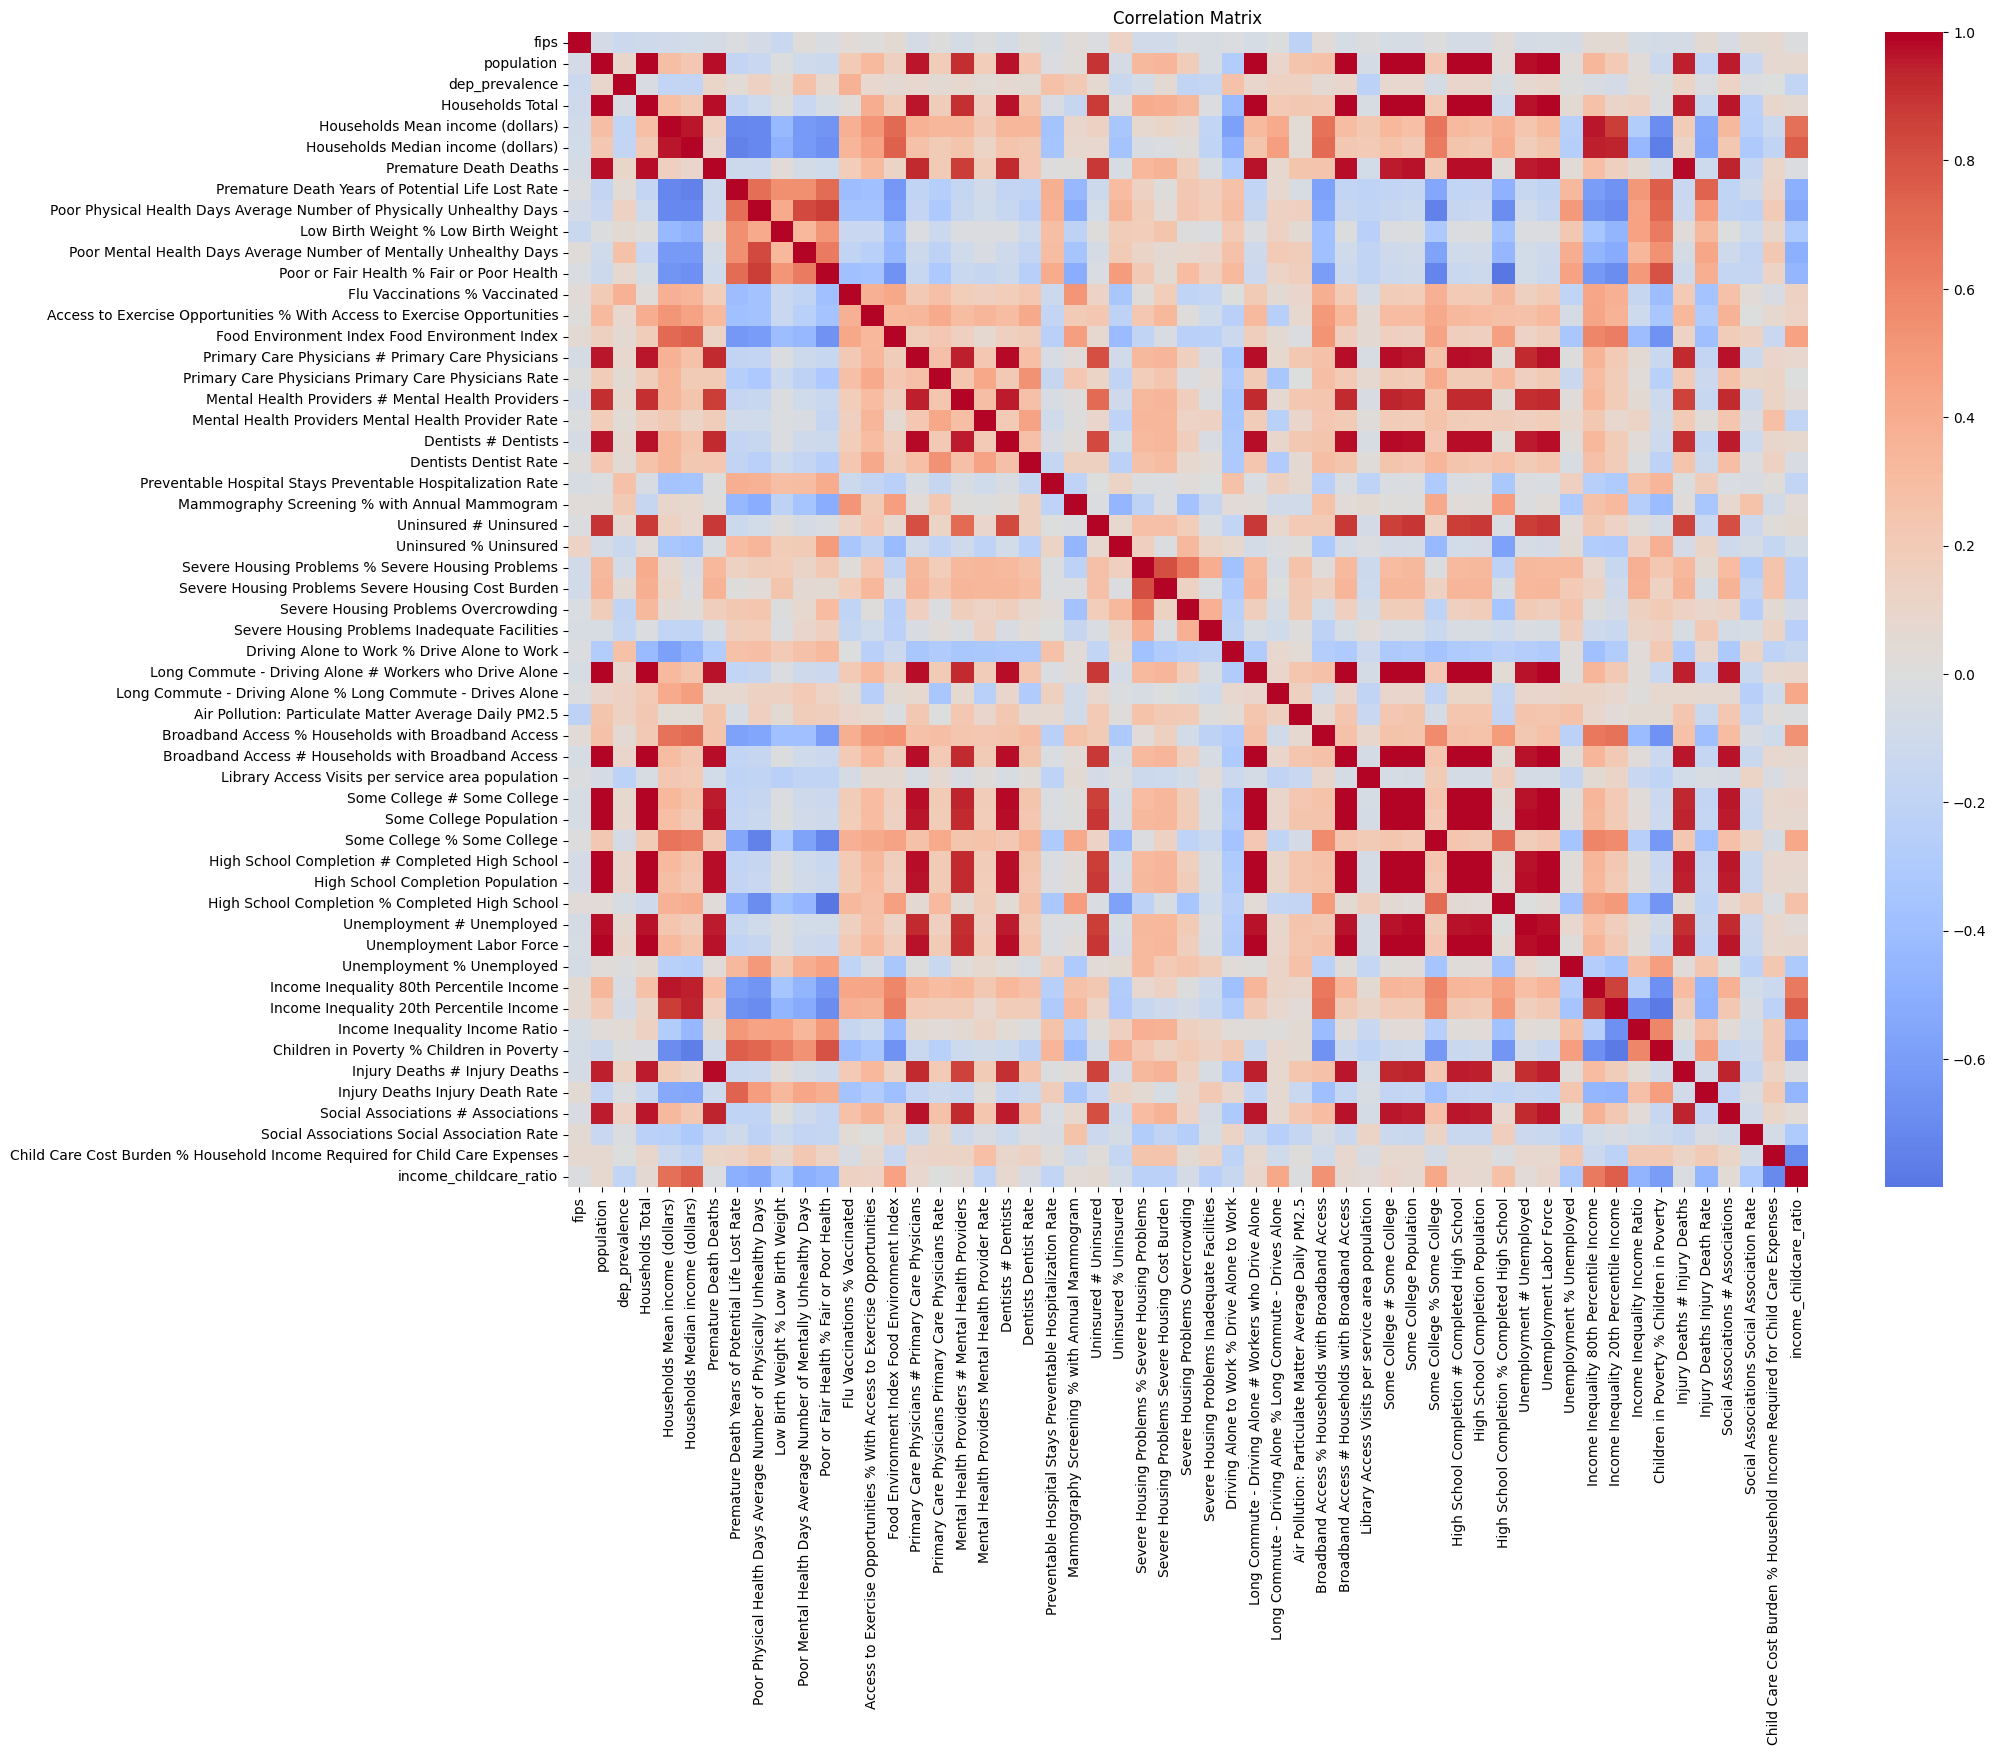

KeyError: "['Poor Mental Health Days'] not in index"

In [17]:
# Heatmap of correlations
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

# Pair plots for key relationships
sns.pairplot(df[['dep_prevalence', 'Households Median income (dollars)', 'Poor Mental Health Days']])
plt.show()

<Axes: xlabel='Households Median income (dollars)', ylabel='dep_prevalence'>

Text(0.5, 1.0, 'Depression Prevalence vs. Median Income')

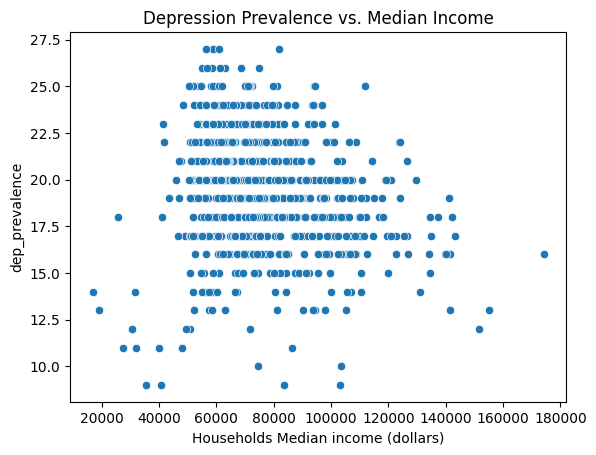

In [18]:
# Example: Depression prevalence vs. income
sns.scatterplot(data=df, x='Households Median income (dollars)', y='dep_prevalence')
plt.title("Depression Prevalence vs. Median Income")
plt.show()

In [23]:
# Optional: Plot on a map (requires geopandas/plotly)
# Example using plotly (if fips codes are compatible):
import plotly.express as px
fig = px.choropleth(df, locations='fips', locationmode="USA-counties",
                    color='dep_prevalence', scope="usa",
                    title="Depression Prevalence by County")
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'locationmode' property of choropleth
        Received value: 'USA-counties'

    The 'locationmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['ISO-3', 'USA-states', 'country names', 'geojson-id']

In [20]:
# Convert to datetime if needed
# df['date_column'] = pd.to_datetime(df['date_column'])

In [21]:
# Create new metrics (e.g., income-to-childcare burden ratio)
df['income_childcare_ratio'] = df['Households Median income (dollars)'] / df['Child Care Cost Burden % Household Income Required for Child Care Expenses']

In [22]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)
Using cached plotly-6.0.1-py3-none-any.whl (14.8 MB)
Note: you may need to restart the kernel to use updated packages.
